# Python Assignment
##### Kimia Noroozi

# Functions

In [1]:
## Import the proper packages from biopython
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## 1. Documentation of the first function

In [2]:
# 1 #
## First, we define a function named "get_sequences_from_file" which does the following to the fasta file named(fasta_fn)
def get_sequences_from_file(fasta_fn):
    ### In this function, first we create an empty dictionary;
    sequence_data_dict = {}
    ### Then, in the following for loop, we use the SeqIO.parse function for the fasta file (we have to define that the file is a fasta file) to go through the sequence enteries of the file one by one,
    for record in SeqIO.parse(fasta_fn, "fasta"):
        #### Create an output called description, in which the the description line of the fasta file is split,
        description = record.description.split()
        #### And put together again as a new input called species name, made up of the first word and the second word in the description line, following each other using a space in between.
        species_name = description[1] + " " + description[2]
        #### Then for each name extracted, the sequence line for that description will be inputted into sequence data dictionary.
        sequence_data_dict[species_name] = record.seq
        #### and then return the said dictionary. 
    return(sequence_data_dict)

In [3]:
## Here, the fasta file for this assignment was inputted into the function created above and the results are then printed for show.
sequence_dict= get_sequences_from_file("penguins_cytb.fasta")
print(sequence_dict)
sequence_dict["Aptenodytes forsteri"]

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA')

## 2. Document and complete the translation function for Dr X's pseudo-code

In [4]:
## This creates a new table for the already existing codon table for traslation of the DNA sequnce.
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

# For loop for DNA sequence trasnlation

In [5]:
def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # create an empty variable for the amino acid sequence
    aa_seq = ""
    for i in range(0,len(string_nucleotides),3):
        codon = string_nucleotides[i:i+3]
        if codon =="TAA" or codon== "TAG" or codon=="AGA" or codon=="AGG" : 
            break
        else:
            aa_seq += mito_table.forward_table[codon]
    return(aa_seq)

translate_function(sequence_dict["Aptenodytes forsteri"])

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH'

## 3. A better way to do it

In [6]:
## Found this "translate" command in biopython. Testing how it works:
sequence_dict["Aptenodytes forsteri"].translate(table=CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"], 
                                                to_stop = True)

Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH')

#### Yay it works. Now let's make it a function:

In [7]:
## First, define a function Translate:
def translate (string_nucleotides):
    ## define the empty variable aa_seq to store the sequence,
    aa_seq = ""
    ## make a table and call the reference codon table to use for translation,
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    ## use the translate command to translate the sequence. The arguments include: 
    ### 1. which reference table to use for translation, 
    ### 2.whether to break if a stop codon is reached.
    aa_seq = string_nucleotides.translate(mito_table, to_stop=True)
    ## Print the aa_seq
    return (aa_seq)

## Testing the function!
translate(sequence_dict["Aptenodytes forsteri"])

Seq('MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAM...LNH')

## 4. Calculating the amino acid sequence's molecular weight 

In [8]:
## First, import the necessary tools
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [9]:
## Let's make a new function that calculates the molecular weight straight from the dictionary
def mol_weight (string_nucleotide):
    ## In order for the function to work we need to first translate and then transform the sequence into a string. Define a new variable to nest the result in.
    aa = ProteinAnalysis(str(translate(string_nucleotide)))
    ## Return the molecular weight using the molecular_weight command!
    return (aa.molecular_weight())

## Let's try it out!
mol_weight(sequence_dict["Aptenodytes forsteri"])

42459.602100000004

#### IT WORKS.

## 5. GC-content calculation

In [10]:
## Again, import the necessary tools!
from Bio.SeqUtils import GC

## Define a function that gives back the GC content using GC command.
def gc_cont (string_nucleotide):
    return(GC(string_nucleotide))

gc_cont(sequence_dict["Aptenodytes forsteri"])

48.38145231846019

# MAIN

## 6. Creat 2 new columns and set their values to 'NaN'

In [11]:
## first, import the sequences using the function made on the first step. 
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
## import other data files into dataframes and lists.
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

In [12]:
## import the libraries needed for making columns and assigning the NaN value
import numpy as np
## using the assign function we add the two new columns and set their values to NaN using np.nan.
penguins_df = penguins_df.assign(Molecular_Weight= np.nan, GC= np.nan)
print (penguins_df)

                    species   mass  Molecular_Weight  GC
0      Aptenodytes forsteri  28.00               NaN NaN
1   Aptenodytes patagonicus  13.40               NaN NaN
2       Eudyptes chrysocome   2.80               NaN NaN
3     Eudyptes chrysolophus   4.50               NaN NaN
4         Eudyptes sclateri   4.25               NaN NaN
5           Eudyptula minor   1.60               NaN NaN
6        Pygoscelis adeliae   4.60               NaN NaN
7     Pygoscelis antarctica   4.10               NaN NaN
8          Pygoscelis papua   6.10               NaN NaN
9       Spheniscus demersus   3.20               NaN NaN
10     Spheniscus humboldti   4.75               NaN NaN
11  Spheniscus magellanicus   3.40               NaN NaN


## 7. Sequence translation and addition of MW and GC values 

In [13]:
## set row counter to zero
row= 0
## for every sequence entered in the data frame,
for key, value in cytb_seqs.items():
    ## I don't need to translate because my molecular weight calculator function has a nested translator function in it!
    ## calculate the molecular weight of the sequence and add it to the corresponding row in the penguins data frame,
    penguins_df.loc[row,'Molecular_Weight']=mol_weight(value)
    ## calculate the GC content of the sequence and add it to the corresponding row in the penguins data frame,
    penguins_df.loc[row,'GC']=gc_cont(value)
    ## add one to the row counter (go to the next row)
    row=row+1
## print the new penguins data frame    
print(penguins_df)

                    species   mass  Molecular_Weight         GC
0      Aptenodytes forsteri  28.00        42459.6021  48.381452
1   Aptenodytes patagonicus  13.40        42563.7067  49.693788
2       Eudyptes chrysocome   2.80        42475.5753  51.181102
3     Eudyptes chrysolophus   4.50        42445.5493  50.918635
4         Eudyptes sclateri   4.25        42475.5753  50.831146
5           Eudyptula minor   1.60        42491.6408  49.256343
6        Pygoscelis adeliae   4.60        42458.6140  49.081365
7     Pygoscelis antarctica   4.10        42404.5423  47.769029
8          Pygoscelis papua   6.10        42595.8759  47.156605
9       Spheniscus demersus   3.20        42431.5490  48.293963
10     Spheniscus humboldti   4.75        42399.5520  49.256343
11  Spheniscus magellanicus   3.40        42459.6021  48.206474


## 8. Mass bar chart

<Axes: title={'center': 'Penguin Mass by Species'}, xlabel='species'>

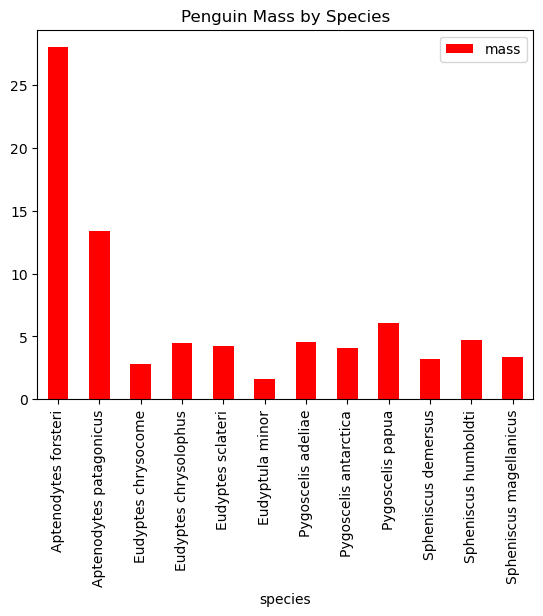

In [21]:
penguins_df.plot(kind='bar', x='species', y='mass', color='red', title='Penguin Mass by Species')
#####for me: how can I sort this?

### Q1. What is the smallest species?
#### Eudyptes minor is the smallest penguin species in this list

### Q2. What is the geographical range of this species?
#### Eudyptula minor is found throughout the southern coast of Australia and as far north as the South Solitary Island off the coast of New South Wales. They are also native to the coasts of New Zealand (Hoskins, et al., 2008).

## 9. Visualization of the molecular weight as a function of GC-content 

<Axes: title={'center': 'Molecular Weight as a Function of GC-content'}, xlabel='GC', ylabel='Molecular_Weight'>

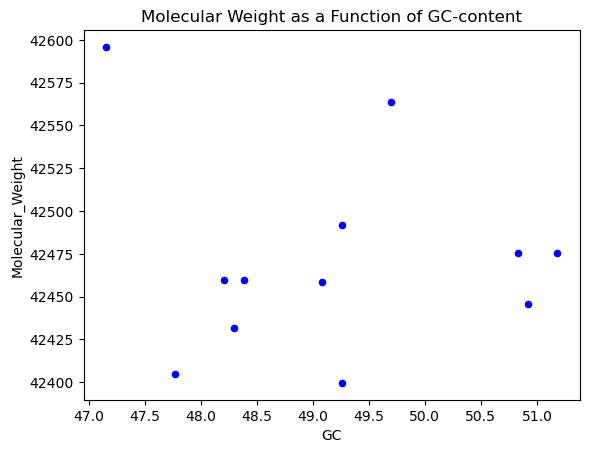

In [22]:
penguins_df.plot(kind ='scatter', x = 'GC', y = 'Molecular_Weight', color='blue', title ='Molecular Weight as a Function of GC-content') 
##### for me: add a line, also color code the data by penguin species

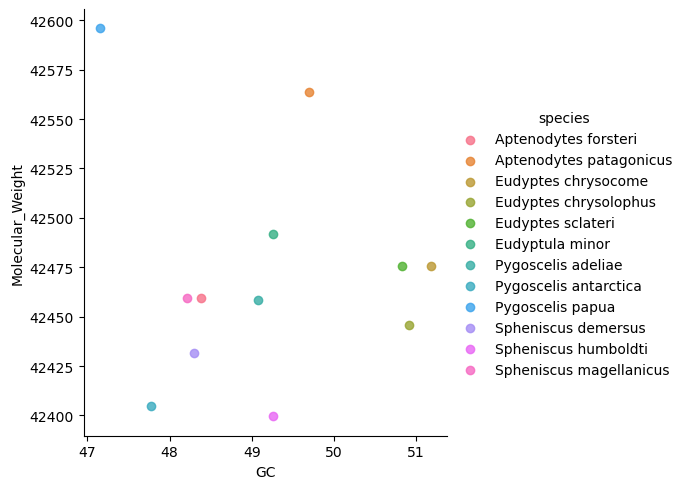

In [40]:
## Plotting the same data to show which species each dot represents:
## first import the necessary tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.lmplot(x="GC",y="Molecular_Weight", data = penguins_df, fit_reg=False, hue='species')
plt.show()

## 10. Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [23]:
penguins_df.to_csv("penguins_mass_cytb.csv")